# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather['coord']['lon']
        city_temp_max = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat,
                          "Lng": city_lng, 
                          "Max Temp": city_temp_max,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })
         # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
    # Give server 10 seconds break in between each iteration
    time.sleep(10)
    
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | west island
Processing Record 2 of Set 1 | farasan
Processing Record 3 of Set 1 | iqaluit
Processing Record 4 of Set 1 | namibe
Processing Record 5 of Set 1 | melekeok village
Processing Record 6 of Set 1 | kingston
Processing Record 7 of Set 1 | dryden
Processing Record 8 of Set 1 | margate
Processing Record 9 of Set 1 | cidade velha
Processing Record 10 of Set 1 | portland
Processing Record 11 of Set 1 | geraldton
Processing Record 12 of Set 1 | sao joao da barra
Processing Record 13 of Set 1 | jaisalmer
Processing Record 14 of Set 1 | murashi
Processing Record 15 of Set 1 | al majaridah
Processing Record 16 of Set 1 | ribeira grande
Processing Record 17 of Set 1 | edinburgh of the seven seas
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | invercargill
Processing Record 21 of Set 1 | sisimiut
Processing Record 22 of Set 1 | taln

In [26]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [27]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,west island,-12.1568,96.8225,24.99,83,40,6.69,CC,1690140537
1,farasan,16.7022,42.1183,32.40,72,62,3.51,SA,1690140619
2,iqaluit,63.7506,-68.5145,10.85,66,40,4.63,CA,1690140530
3,namibe,-15.1961,12.1522,17.93,75,96,3.27,AO,1690140639
4,melekeok village,7.4957,134.6367,26.31,89,100,4.12,PW,1690140649


In [28]:
# Export the City_Data into a csv
#city_data_df.to_csv("resources/cities.csv", index_label="City_ID")

In [29]:
# Read saved data
#city_data_df = pd.read_csv("resources/cities.csv", index_col="City_ID")

# Display sample data
#city_data_df

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

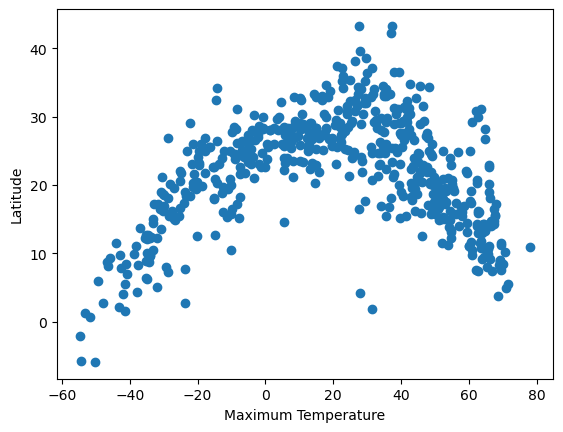

In [32]:
# Build scatter plot for latitude vs. temperature

plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])
plt.xlabel("Maximum Temperature")
plt.ylabel("Latitude")

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

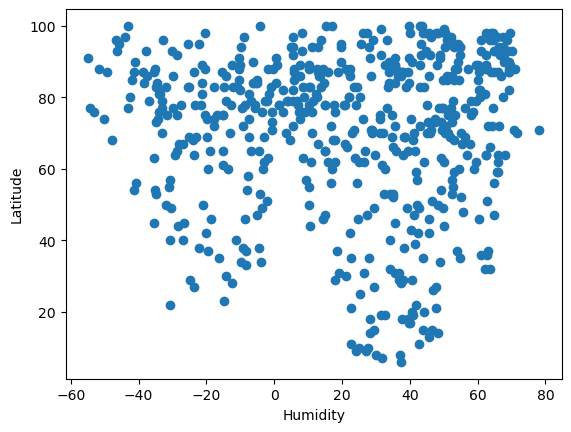

In [33]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])
plt.xlabel("Humidity")
plt.ylabel("Latitude")
# Save the figure
#plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

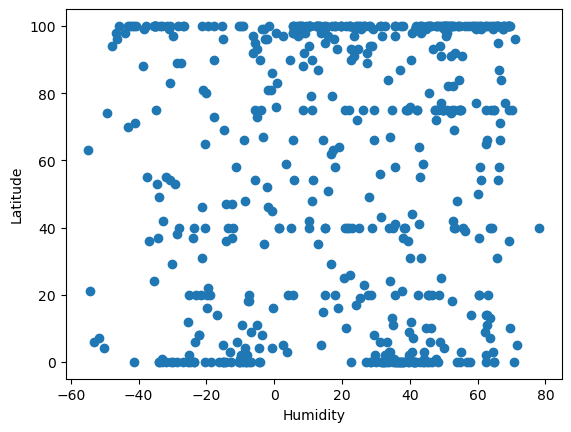

In [35]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
# Save the figure
#plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

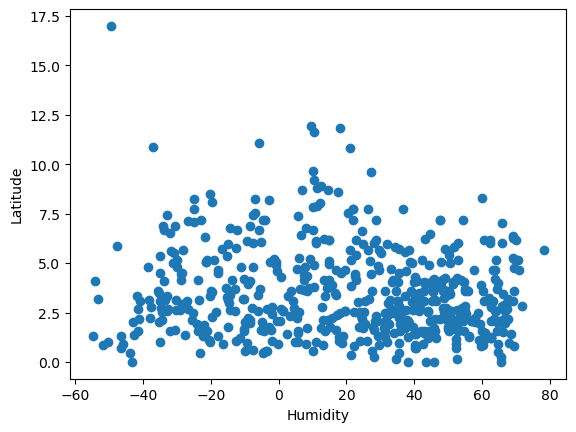

In [36]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")
# Save the figure
#plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [45]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,farasan,16.7022,42.1183,32.40,72,62,3.51,SA,1690140619
2,iqaluit,63.7506,-68.5145,10.85,66,40,4.63,CA,1690140530
4,melekeok village,7.4957,134.6367,26.31,89,100,4.12,PW,1690140649
5,kingston,17.9970,-76.7936,34.58,62,20,11.83,JM,1690140429
6,dryden,49.7833,-92.7503,21.16,49,75,3.60,CA,1690140670


In [46]:
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,west island,-12.1568,96.8225,24.99,83,40,6.69,CC,1690140537
3,namibe,-15.1961,12.1522,17.93,75,96,3.27,AO,1690140639
10,geraldton,-28.7667,114.6000,7.23,65,0,4.12,AU,1690140584
11,sao joao da barra,-21.6403,-41.0511,23.05,78,20,6.32,BR,1690140563
16,edinburgh of the seven seas,-37.0676,-12.3116,13.67,79,36,10.87,SH,1690140525


###  Temperature vs. Latitude Linear Regression Plot

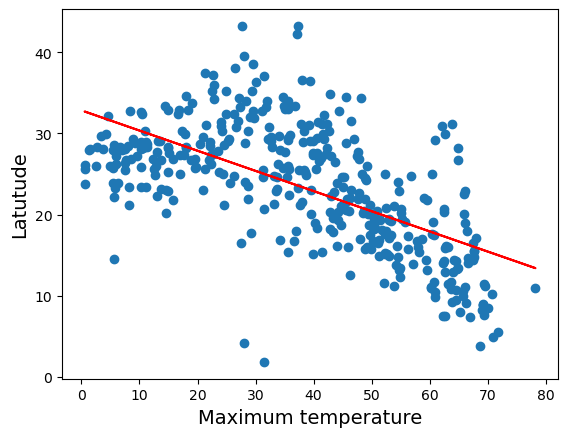

In [47]:
# Linear regression on Northern Hemisphere

x_values = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Maximum temperature", fontsize =14)
plt.ylabel("Latutude", fontsize=14)
plt.show()



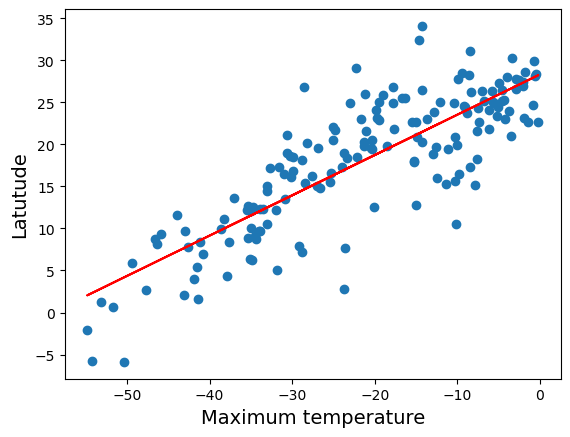

In [48]:
x_values = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Maximum temperature", fontsize =14)
plt.ylabel("Latutude", fontsize=14)
plt.show()



**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

**Discussion about the linear relationship:** YOUR RESPONSE HERE

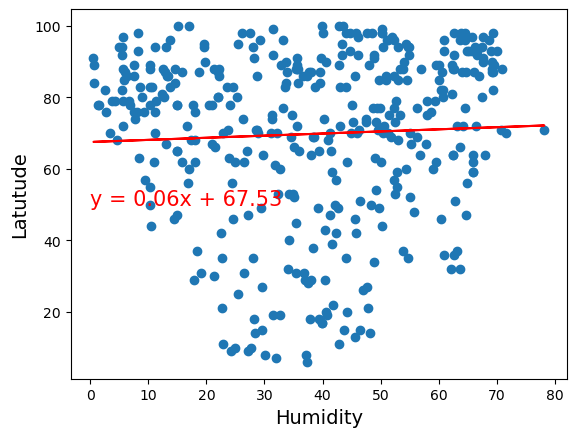

In [58]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Humidity", fontsize =14)
plt.ylabel("Latutude", fontsize=14)
plt.show()

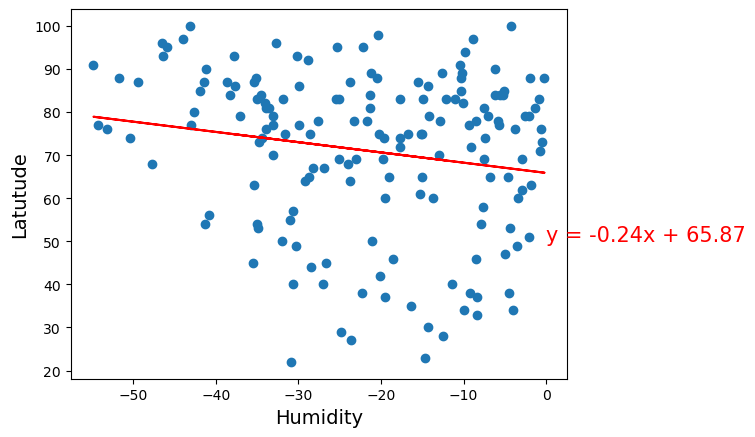

In [59]:
# Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Humidity", fontsize =14)
plt.ylabel("Latutude", fontsize=14)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

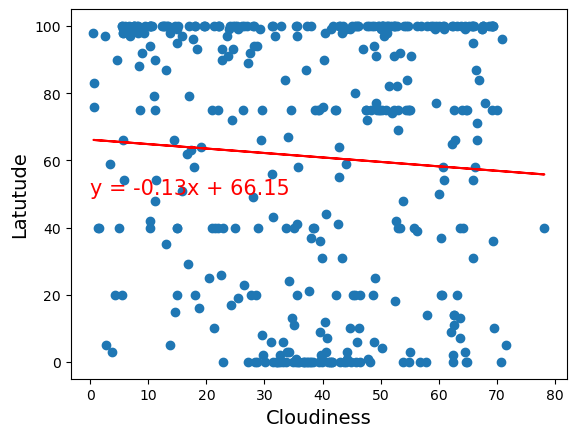

In [60]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Cloudiness", fontsize =14)
plt.ylabel("Latutude", fontsize=14)
plt.show()

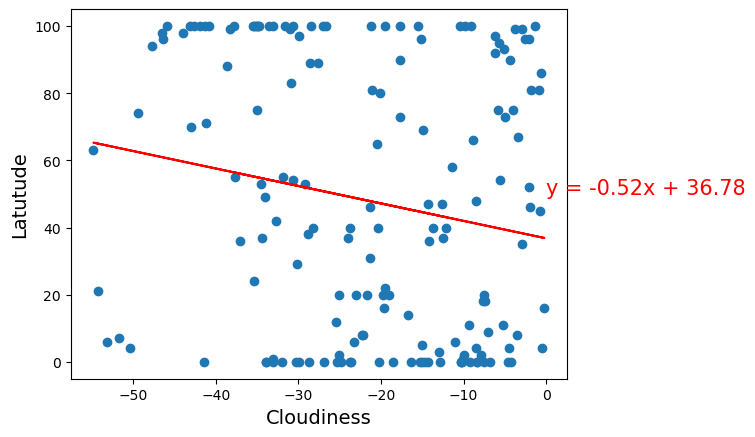

In [61]:
# Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Cloudiness", fontsize =14)
plt.ylabel("Latutude", fontsize=14)
plt.show()

In [63]:
###Wind Speed vs. Latitude Linear Regression Plot¶

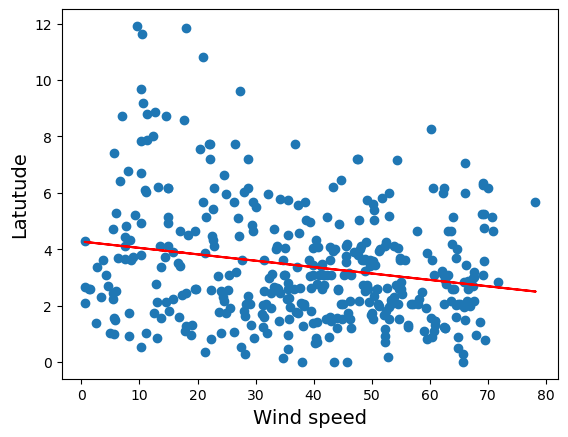

In [64]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Wind speed", fontsize =14)
plt.ylabel("Latutude", fontsize=14)
plt.show()

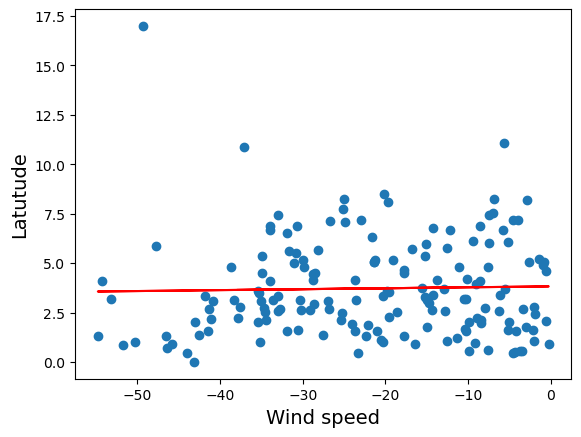

In [65]:
# Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Wind speed", fontsize =14)
plt.ylabel("Latutude", fontsize=14)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE